In [1]:
#we imported libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Loading data

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see up there, there are empty places in our dataset.

I am copying the dataset due to numerical errors that may occur in the data

In [6]:
newdf = df.copy()

In [7]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


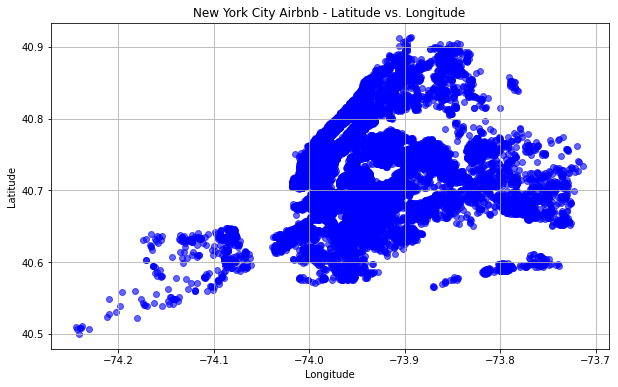

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(newdf['longitude'], newdf['latitude'], alpha=0.6, c='b', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York City Airbnb - Latitude vs. Longitude')
plt.grid(True)
plt.show()


Now we can see the distribution of Airbnb in New York City.

We are going to draw a boxplot to show the distribution of prices for different neighborhood groups.

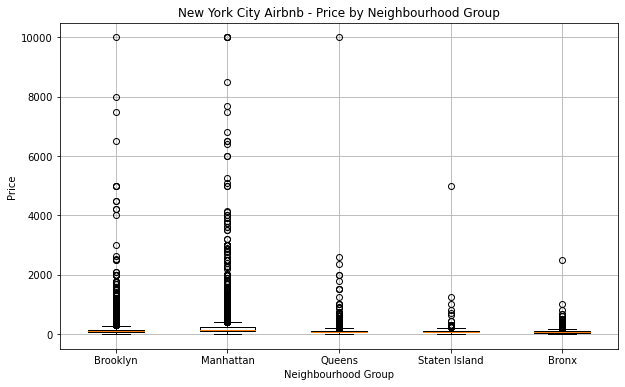

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot([newdf[newdf['neighbourhood_group'] == group]['price'] for group in newdf['neighbourhood_group'].unique()], labels=newdf['neighbourhood_group'].unique())
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('New York City Airbnb - Price by Neighbourhood Group')
plt.grid(True)
plt.show()

Room type pie chart

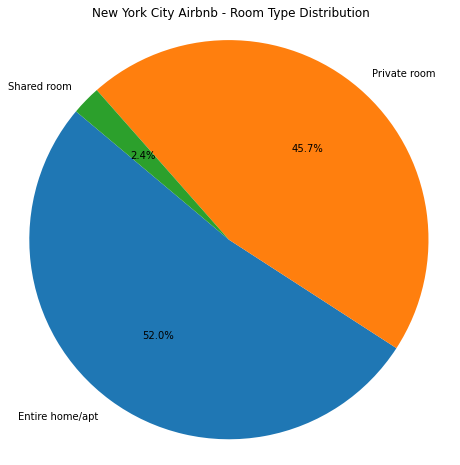

In [10]:
room_type_counts = newdf['room_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('New York City Airbnb - Room Type Distribution')
plt.show()

We can clearly see the distrubution of room types above

## Analysis of room type and price:

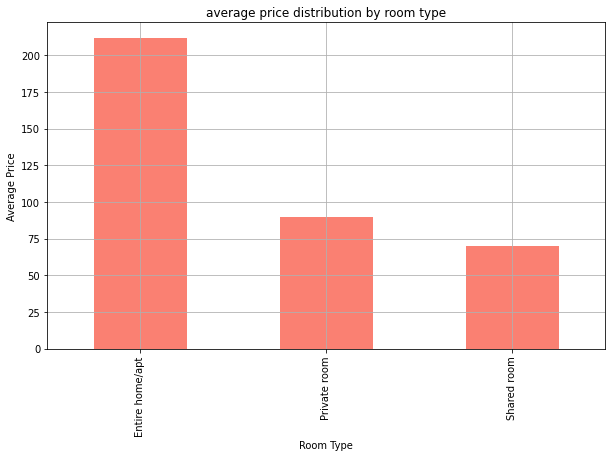

In [13]:
room_prices = newdf.groupby('room_type')['price'].mean()
plt.figure(figsize=(10, 6))
room_prices.plot(kind='bar', color='salmon')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('average price distribution by room type')
plt.grid(True)
plt.show()

In this analysis, we will examine the relationship between the number of comments and the average number of comments per month.

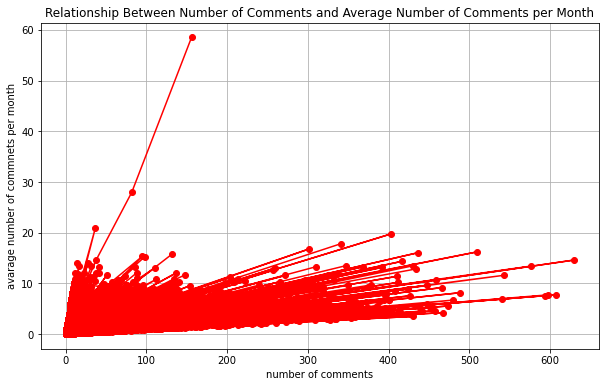

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(reviews_analysis['number_of_reviews'], reviews_analysis['reviews_per_month'], linestyle='-', marker='o', color='r')
plt.xlabel('number of comments')
plt.ylabel('avarage number of commnets per month')
plt.title('Relationship Between Number of Comments and Average Number of Comments per Month')
plt.grid(True)
plt.show()

We will examine the relationship between the minimum length of stay and the price.

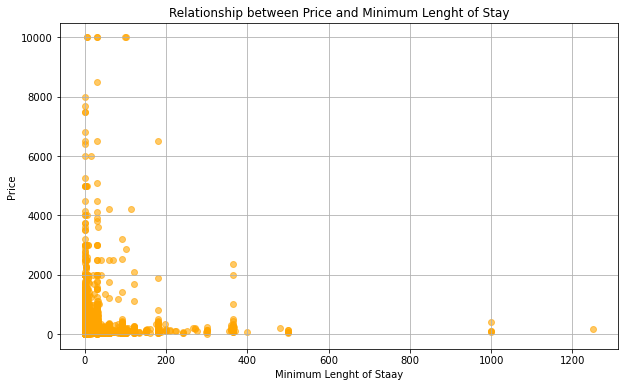

In [19]:
min_nights_price_analysis = newdf[['minimum_nights', 'price']]
plt.figure(figsize=(10, 6))
plt.scatter(min_nights_price_analysis['minimum_nights'], min_nights_price_analysis['price'], alpha=0.6, c='orange', marker='o')
plt.xlabel('Minimum Lenght of Staay')
plt.ylabel('Price')
plt.title('Relationship between Price and Minimum Lenght of Stay')
plt.grid(True)
plt.show()

#### Analysis of Neighbourhood Group and Availability

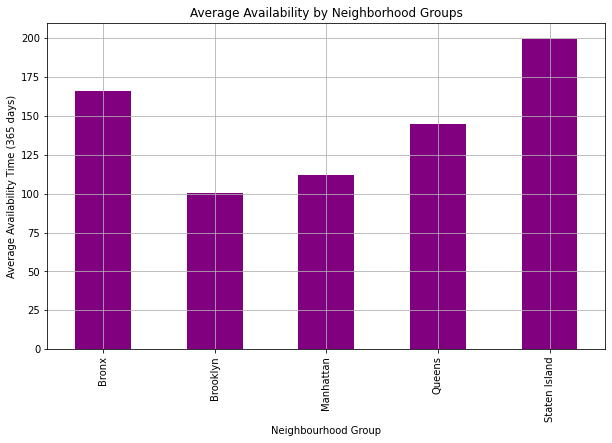

In [20]:
availability_group_analysis = df.groupby('neighbourhood_group')['availability_365'].mean()
plt.figure(figsize=(10, 6))
availability_group_analysis.plot(kind='bar', color='purple')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability Time (365 days)')
plt.title('Average Availability by Neighborhood Groups')
plt.grid(True)
plt.show()

we can see how long neighborhood groups are generally available

We will draw a graph to examine the relationship of the most recent comments to prices.

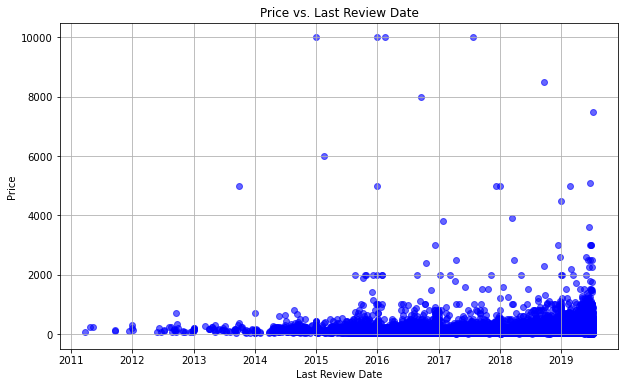

In [22]:
df['last_review'] = pd.to_datetime(df['last_review'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['last_review'], df['price'], alpha=0.6, color='blue')
plt.xlabel('Last Review Date')
plt.ylabel('Price')
plt.title('Price vs. Last Review Date')
plt.grid(True)
plt.show()

### Calculating Correlation Matrix

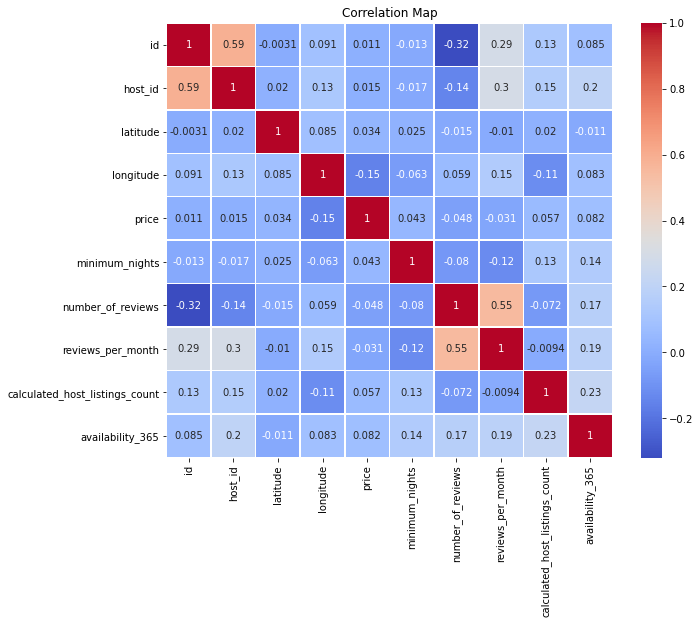

In [23]:
#calculation of matrix
correlation_matrix = newdf.corr()

#drawing the correlation map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map')
plt.show()